In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn import svm
from sklearn.metrics import confusion_matrix,classification_report, precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score

In [2]:
data = pd.read_csv('SPFD.csv')
print(data.shape)
X = data.iloc[:,:-1]
X.head()

(1000, 3)


,StD,TM
0,7,27
1,2,43
2,7,26
3,8,29
4,3,42


In [3]:
Y = data.iloc[:,-1:]
Y.head()

,PF
0,1
1,0
2,1
3,1
4,0


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [5]:
svm_model = svm.SVC(kernel='linear', C=0.1)

In [6]:
svm_model.fit(X_train, Y_train.values.ravel())

SVC(C=0.1, kernel='linear')

In [7]:
y_predict = svm_model.predict(X_test)

In [8]:
print('Точность классификации svm: {:.3f}'.format(svm_model.score(X_test, Y_test)))

Точность классификации svm: 0.967


In [9]:
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97       148
           1       0.94      1.00      0.97       152

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



In [10]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
for kernel in kernels:
    svc = svm.SVC(kernel=kernel).fit(X_train, Y_train.values.ravel())
    print('Точность классификации kernel = {}: {:.3f}'.format(kernel, svc.score(X_test, Y_test)))

Точность классификации kernel = linear: 0.967
Точность классификации kernel = rbf: 0.967
Точность классификации kernel = poly: 0.967
Точность классификации kernel = sigmoid: 0.137


In [11]:
gammas = [0.1, 0.5, 1, 10, 100]
for gamma in gammas:
    svc = svm.SVC(kernel='rbf', gamma=gamma).fit(X_train, Y_train.values.ravel())
    print('Точность классификации rbf gamma = {}: {:.3f}'.format(gamma, svc.score(X_test, Y_test)))

Точность классификации rbf gamma = 0.1: 0.967
Точность классификации rbf gamma = 0.5: 0.990
Точность классификации rbf gamma = 1: 0.987
Точность классификации rbf gamma = 10: 0.987
Точность классификации rbf gamma = 100: 0.987


In [12]:
cs = [0.1, 1, 10, 100]
for c in cs:
    svc = svm.SVC(kernel='linear', C=c).fit(X_train, Y_train.values.ravel())
    print('Точность классификации linear C= {}: {:.3f}'.format(c, svc.score(X_test, Y_test)))

Точность классификации linear C= 0.1: 0.967
Точность классификации linear C= 1: 0.967
Точность классификации linear C= 10: 0.967
Точность классификации linear C= 100: 0.967


In [13]:
for c in cs:
    svc = svm.SVC(kernel='rbf', C=c).fit(X_train, Y_train.values.ravel())
    print('Точность классификации rbf C= {}: {:.3f}'.format(c, svc.score(X_test, Y_test)))

Точность классификации rbf C= 0.1: 0.940
Точность классификации rbf C= 1: 0.967
Точность классификации rbf C= 10: 0.967
Точность классификации rbf C= 100: 0.977


In [14]:
for c in cs:
    svc = svm.SVC(kernel='poly', C=c).fit(X_train, Y_train.values.ravel())
    print('Точность классификации poly C= {}: {:.3f}'.format(c, svc.score(X_test, Y_test)))

Точность классификации poly C= 0.1: 0.953
Точность классификации poly C= 1: 0.967
Точность классификации poly C= 10: 0.967
Точность классификации poly C= 100: 0.967


In [15]:
degrees = [0, 1, 2, 3, 4]
for degree in degrees:
    svc = svm.SVC(kernel='poly', degree=degree).fit(X_train, Y_train.values.ravel())
    print('Точность классификации poly degree = {}: {:.3f}'.format(degree, svc.score(X_test, Y_test)))

Точность классификации poly degree = 0: 0.493
Точность классификации poly degree = 1: 0.967
Точность классификации poly degree = 2: 0.967
Точность классификации poly degree = 3: 0.967
Точность классификации poly degree = 4: 0.967


In [16]:
svc = svm.SVC(kernel='rbf', gamma=0.5, C=1)
svc.fit(X_train, Y_train.values.ravel())
print('Точность классификации svm: {:.3f}'.format(svc.score(X_test, Y_test)))

Точность классификации svm: 0.990


In [17]:
y_predict = svc.predict(X_test)
print(classification_report(Y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       148
           1       0.98      1.00      0.99       152

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [22]:
print(confusion_matrix(Y_test, y_predict))

[[145   3]
 [  0 152]]


In [23]:
fpr, tpr, thresholds = roc_curve(Y_test, y_predict)

In [24]:
def plot_roc_curve(fpr, tpr, label=None):
     plt.plot(fpr, tpr, linewidth=2, label=label)
     plt.plot([0, 1], [fpr, tpr], [0, 1], 'k--') # dashed diagonal
     plt.xlabel('False Positive Rate, FPR (1 - specificity)')
     plt.ylabel('True Positive Rate, TPR (Recall)')
     plt.title('ROC curve')

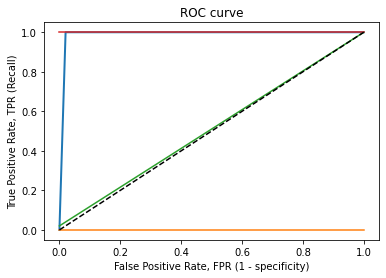

Площадь под ROC кривой: 0.990


In [25]:
plot_roc_curve(fpr, tpr)
plt.show()
print('Площадь под ROC кривой: {:.3f}'.format(roc_auc_score(Y_test, y_predict)))